In [1]:
#from train_retinanet import plot_history
import pandas as pd
import keras_retinanet
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras_retinanet import models, losses
from keras_retinanet.models.retinanet import retinanet_bbox
from keras_retinanet.utils.model import freeze as freeze_model
from keras_retinanet.utils.config import read_config_file, parse_anchor_parameters, parse_pyramid_levels
from keras_retinanet.callbacks.eval import Evaluate
from keras_retinanet.callbacks import RedirectModel
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import SGD

In [2]:
epochs = 49

## CSV To Plot

## ResNet-50 

In [82]:
df_resnet50_2 = pd.read_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\retinanet_resnet50_aug_log.csv')

In [83]:
def plot_history(df_resnet50_2, fig, subtitle, epochs):
    epoch_list = df_resnet50_2['epoch']
    regression_loss = df_resnet50_2['loss']
    classification_loss = df_resnet50_2['classification_loss']
    val_regression_loss = df_resnet50_2['val_regression_loss']
    val_classification_loss = df_resnet50_2['val_classification_loss']
    loss = df_resnet50_2['loss']
    val_loss = df_resnet50_2['val_loss']
    val_mAP = df_resnet50_2['mAP']
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

   
    ax1.plot(epoch_list, loss, label='Train Loss', linewidth=4)
    ax1.plot(epoch_list, val_loss, label='Validation Loss', linewidth=4, color='green')
    #ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_xlim(0,50)
    ax1.set_ylim(0, 4)
    ax1.set_ylabel('Loss',fontsize = 18,  color='black')
    ax1.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax1.set_title('Total Loss (Classification Loss + Regression Loss)',fontsize = 15, fontweight='bold', color='black')
    ax1.tick_params(axis='x', colors='black', labelsize=18)
    ax1.tick_params(axis='y', colors='black', labelsize=18)
    l1 = ax1.legend(loc="best", fontsize=18, edgecolor='black', markerscale=2.0)
    
    ax2.plot(epoch_list, val_mAP, label='Validation AP',linewidth=4)
    #ax2.set_xticks(np.arange(1, epochs+1, 1))
    ax2.set_xlim(0,50)
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Acuuracy',fontsize = 18,  color='black')
    ax2.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax2.set_title('Model Accuracy', fontsize = 18, fontweight='bold', color='black')
    ax2.tick_params(axis='x', colors='black', labelsize=18)
    ax2.tick_params(axis='y', colors='black', labelsize=18)
    #l2 = ax2.legend(loc="best", fontsize=18, edgecolor='black',  markerscale=2.0)
    
    plt.savefig(fig, dpi=600)

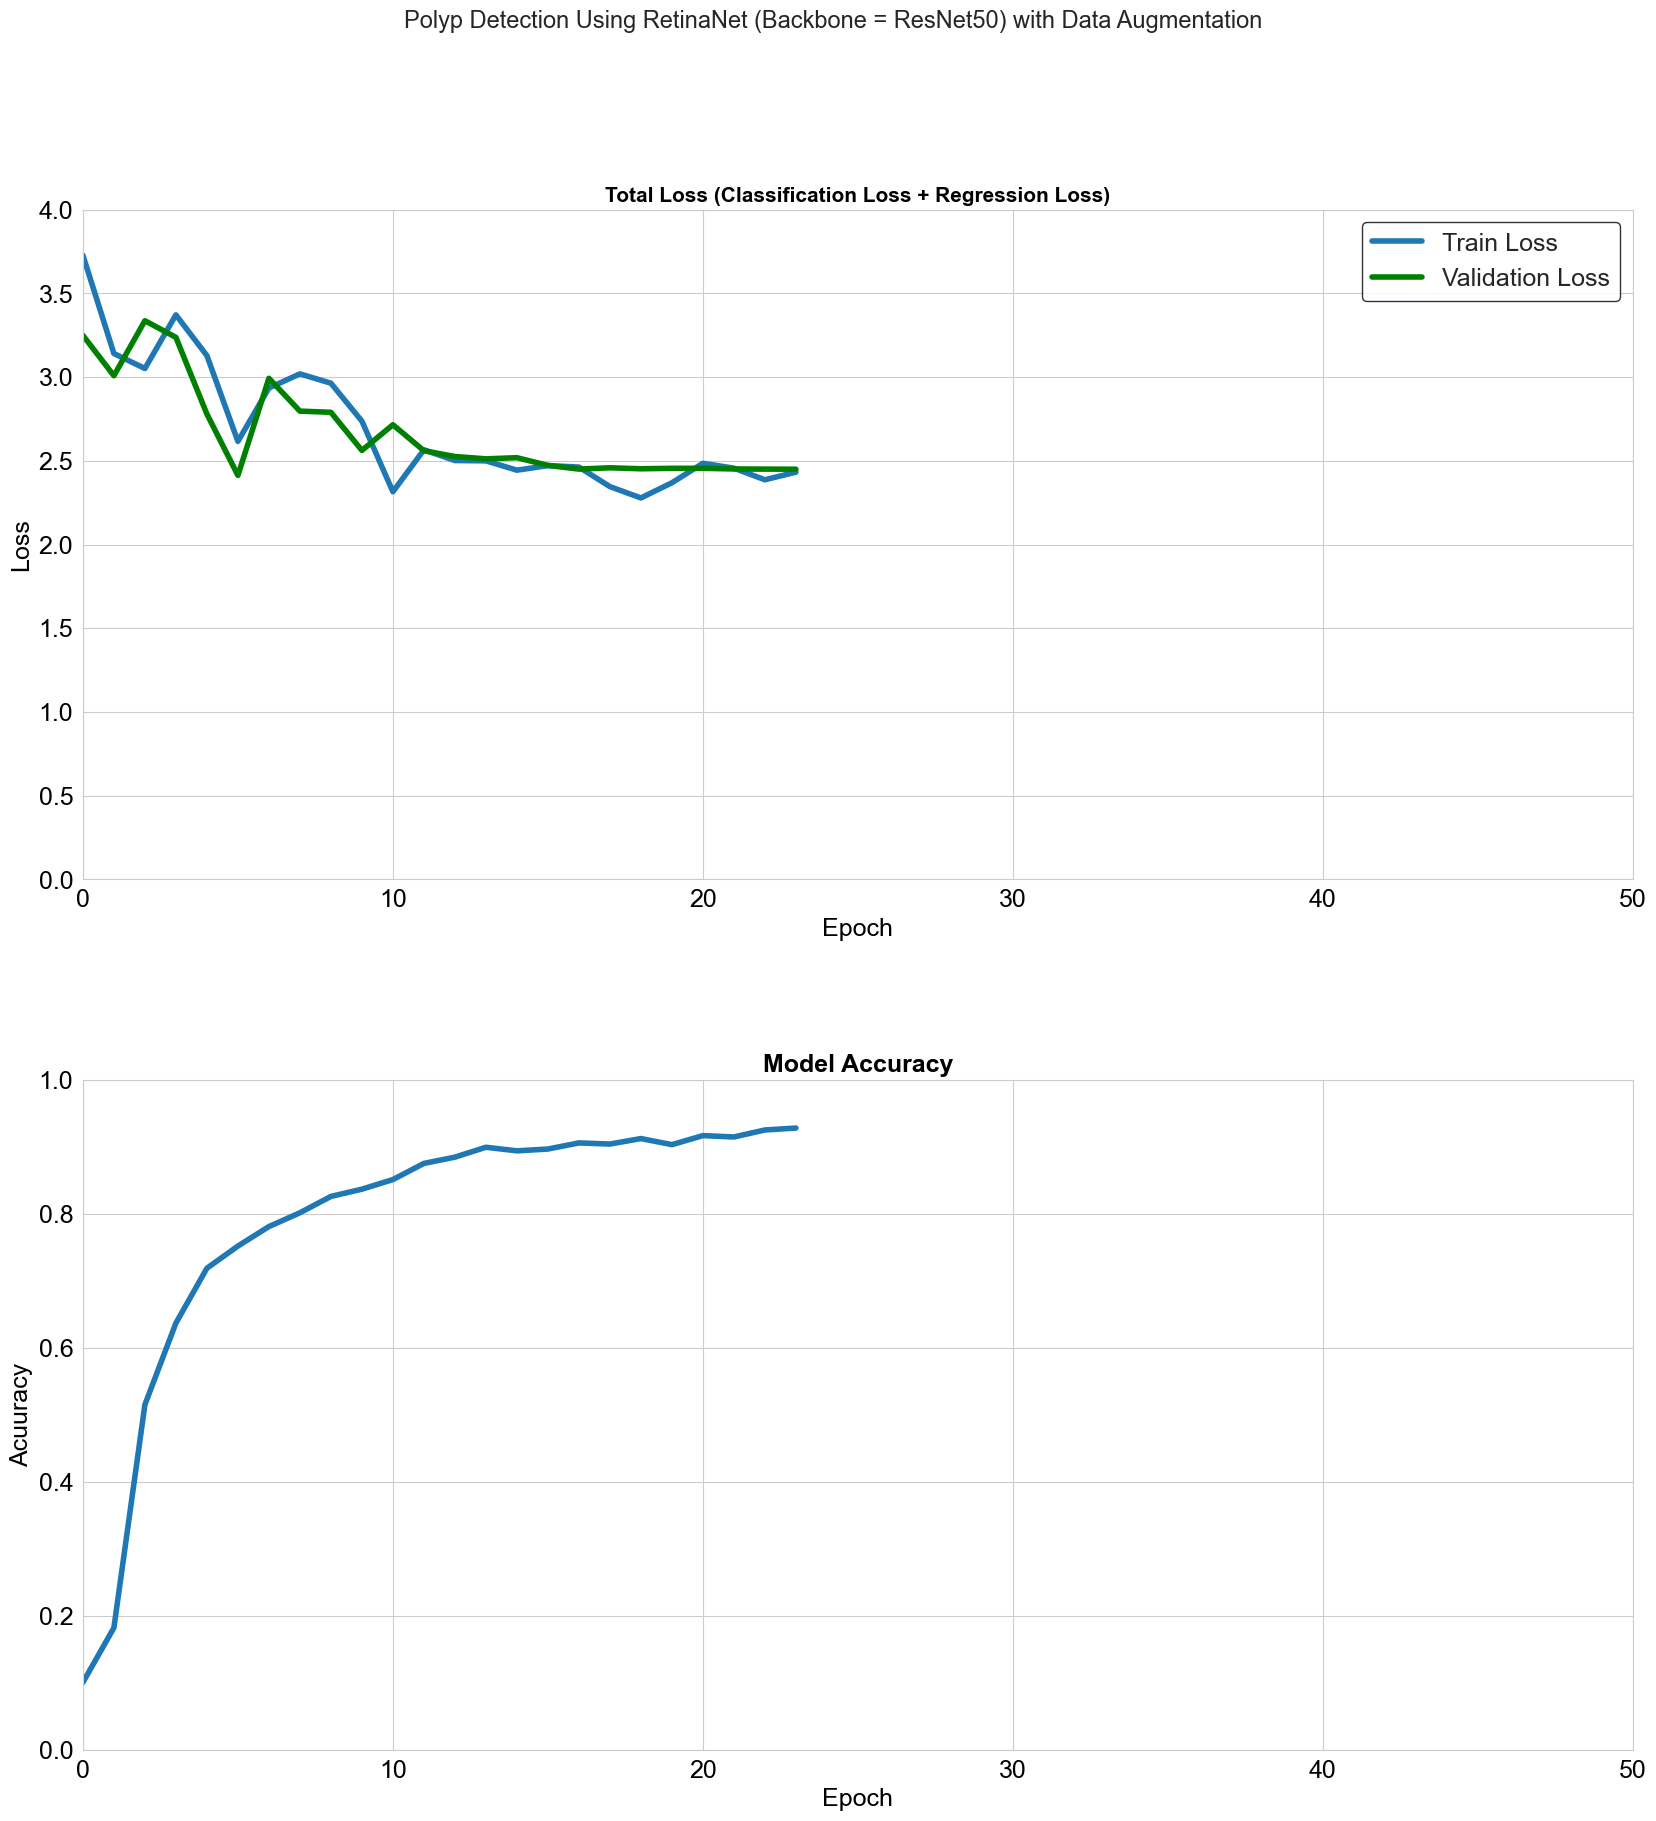

In [84]:
fig = r'C:\Users\Asus\Desktop\retinanet_resnet50_aug1.png'
title = 'Polyp Detection Using RetinaNet (Backbone = ResNet50) with Data Augmentation'
plot_history(df_resnet50_2, fig, title, epochs)

## ResNet-101

In [85]:
df_resnet101_2 = pd.read_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\retinanet_resnet50_aug_log.csv')

In [86]:

def plot_history(df_resnet101_2, fig, subtitle, epochs):
    epoch_list = df_resnet101_2['epoch']
    regression_loss = df_resnet101_2['loss']
    classification_loss = df_resnet101_2['classification_loss']
    val_regression_loss = df_resnet101_2['val_regression_loss']
    val_classification_loss = df_resnet101_2['val_classification_loss']
    loss = df_resnet101_2['loss']
    val_loss = df_resnet101_2['val_loss']
    val_mAP = df_resnet101_2['mAP']
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

    ax1.plot(epoch_list, loss, label='Train Loss', linewidth=4)
    ax1.plot(epoch_list, val_loss, label='Validation Loss', linewidth=4, color='green')
    #ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_xlim(0,50)
    ax1.set_ylim(0, 4)
    ax1.set_ylabel('Loss',fontsize = 18,  color='black')
    ax1.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax1.set_title('Total Loss (Classification Loss + Regression Loss)',fontsize = 15, fontweight='bold', color='black')
    ax1.tick_params(axis='x', colors='black', labelsize=18)
    ax1.tick_params(axis='y', colors='black', labelsize=18)
    l1 = ax1.legend(loc="best", fontsize=18, edgecolor='black', markerscale=2.0)
    
    ax2.plot(epoch_list, val_mAP, label='Validation AP',linewidth=4)
    #ax2.set_xticks(np.arange(1, epochs+1, 1))
    ax2.set_xlim(0,50)
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Acuuracy',fontsize = 18,  color='black')
    ax2.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax2.set_title('Model Accuracy', fontsize = 18, fontweight='bold', color='black')
    ax2.tick_params(axis='x', colors='black', labelsize=18)
    ax2.tick_params(axis='y', colors='black', labelsize=18)
    #l2 = ax2.legend(loc="best", fontsize=18, edgecolor='black',  markerscale=2.0)
    
    plt.savefig(fig, dpi=600)

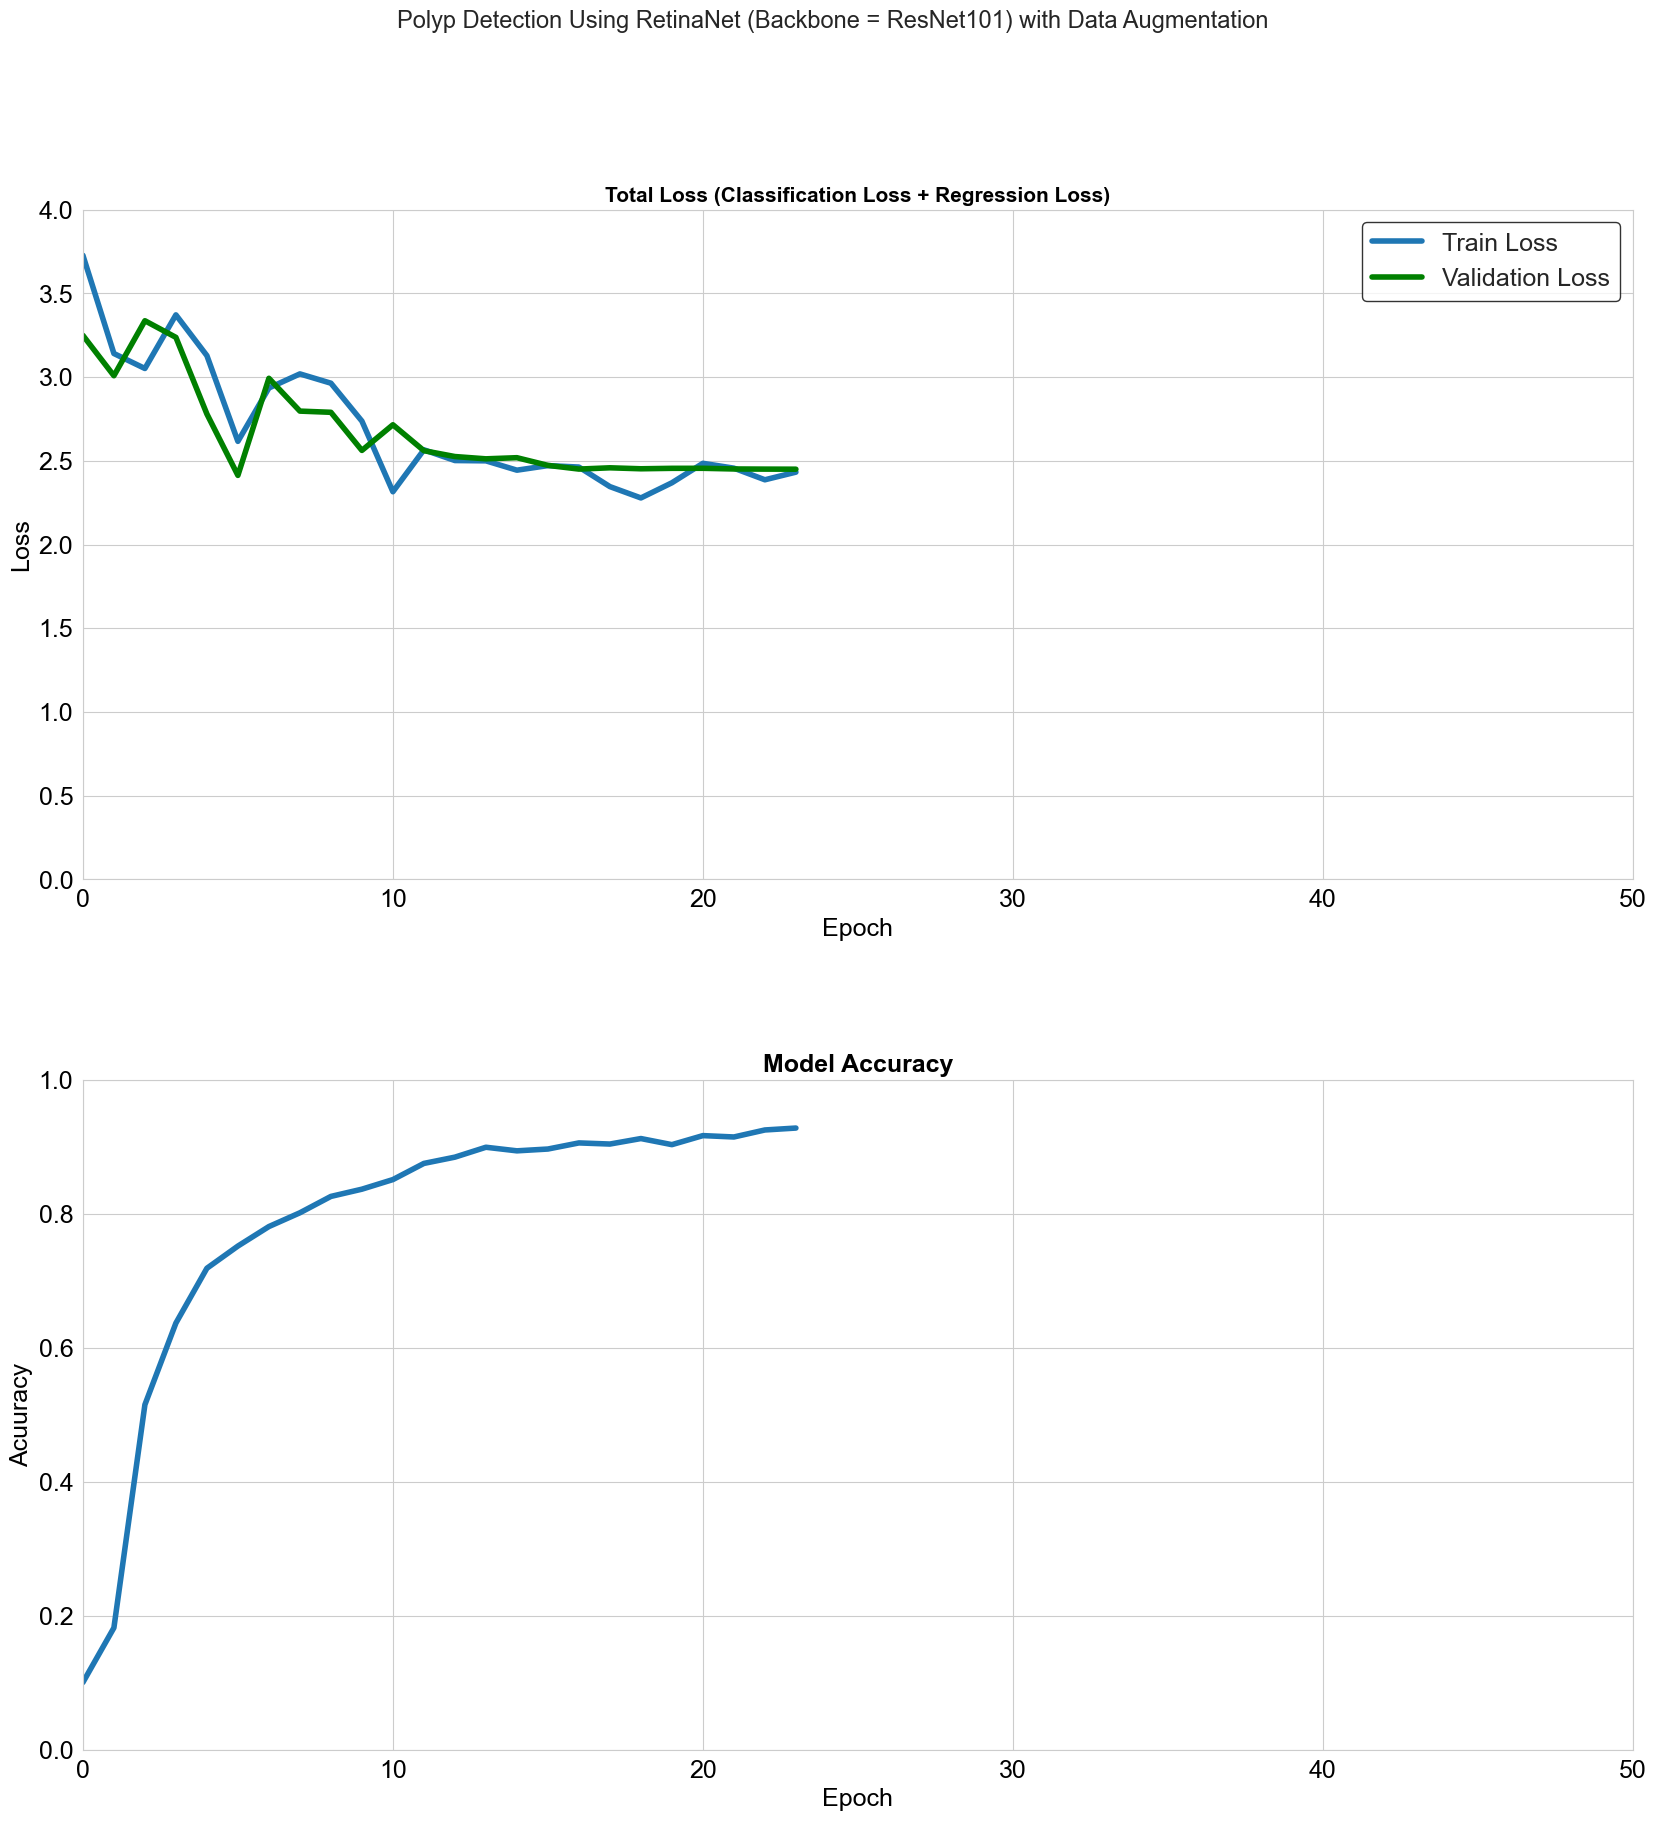

In [87]:
fig = r'C:\Users\Asus\Desktop\ttretinanet_resnet101_aug.png'
title = 'Polyp Detection Using RetinaNet (Backbone = ResNet101) with Data Augmentation'
plot_history(df_resnet101_2, fig, title, epochs)

## ResNet-152 

In [88]:
df_resnet152_2 = pd.read_csv(r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\retinanet_resnet152_aug_log.csv")

In [89]:
def plot_history(df_resnet152_2, fig, subtitle, epochs):
    epoch_list = df_resnet152_2['epoch']
    regression_loss = df_resnet152_2['loss']
    classification_loss = df_resnet152_2['classification_loss']
    val_regression_loss = df_resnet152_2['val_regression_loss']
    val_classification_loss = df_resnet152_2['val_classification_loss']
    loss = df_resnet152_2['loss']
    val_loss = df_resnet152_2['val_loss']
    val_mAP = df_resnet152_2['mAP']
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

    ax1.plot(epoch_list, loss, label='Train Loss', linewidth=4)
    ax1.plot(epoch_list, val_loss, label='Validation Loss', linewidth=4, color='green')
    #ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_xlim(0,50)
    ax1.set_ylim(0, 4)
    ax1.set_ylabel('Loss',fontsize = 18,  color='black')
    ax1.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax1.set_title('Total Loss (Classification Loss + Regression Loss)',fontsize = 15, fontweight='bold', color='black')
    ax1.tick_params(axis='x', colors='black', labelsize=18)
    ax1.tick_params(axis='y', colors='black', labelsize=18)
    l1 = ax1.legend(loc="best", fontsize=18, edgecolor='black', markerscale=2.0)
    
    ax2.plot(epoch_list, val_mAP, label='Validation AP',linewidth=4)
    #ax2.set_xticks(np.arange(1, epochs+1, 1))
    ax2.set_xlim(0,50)
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Acuuracy',fontsize = 18,  color='black')
    ax2.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax2.set_title('Model Accuracy', fontsize = 18, fontweight='bold', color='black')
    ax2.tick_params(axis='x', colors='black', labelsize=18)
    ax2.tick_params(axis='y', colors='black', labelsize=18)
    
    plt.savefig(fig, dpi=600)

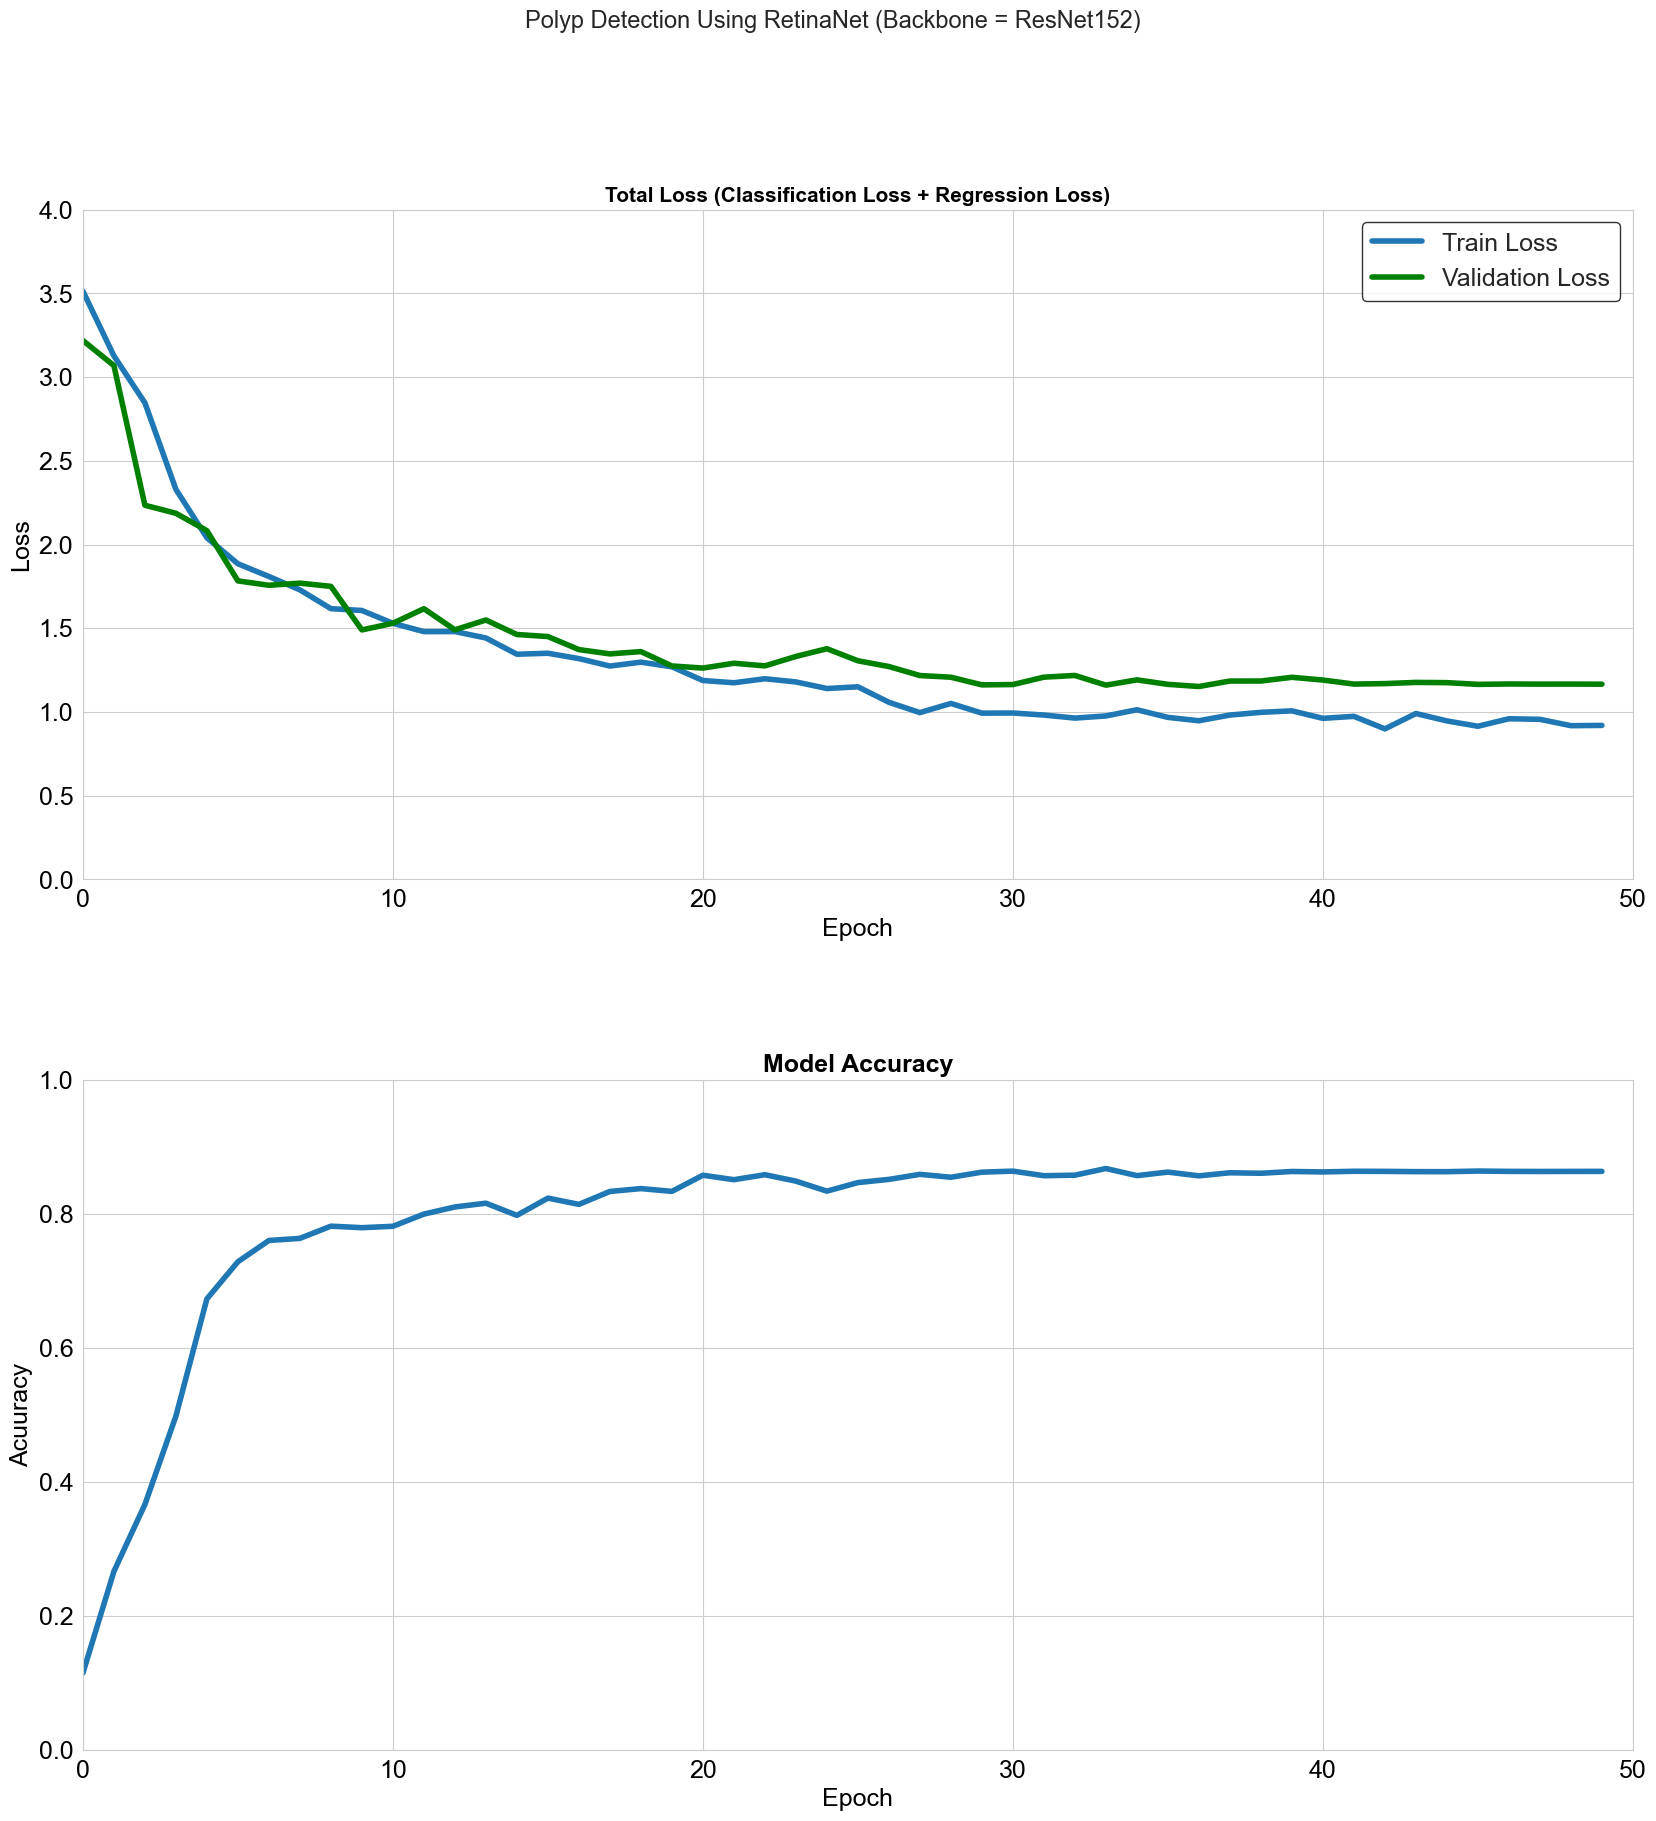

In [90]:
fig = r'C:\Users\Asus\Desktop\ttretinanet_resnet152_aug.png'
title = 'Polyp Detection Using RetinaNet (Backbone = ResNet152)'
plot_history(df_resnet152_2, fig, title, epochs)

## VGG-16 

In [91]:
df_vgg16_2 = pd.read_csv(r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\Unet_VGG-16.csv")

In [92]:
def plot_history(df_vgg16_2, fig, subtitle, epochs):
    epoch_list = df_vgg16_2['epoch']
    loss = df_vgg16_2['loss']
    val_loss = df_vgg16_2['val_loss']
    val_mAP = df_vgg16_2['mAP']
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

   
    ax1.plot(epoch_list, loss, label='Train Loss', linewidth=4)
    ax1.plot(epoch_list, val_loss, label='Validation Loss', linewidth=4, color='green')
    #ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_xlim(0,50)
    ax1.set_ylim(0, 4)
    ax1.set_ylabel('Loss',fontsize = 18,  color='black')
    ax1.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax1.set_title('Total Loss (Classification Loss + Regression Loss)',fontsize = 15, fontweight='bold', color='black')
    ax1.tick_params(axis='x', colors='black', labelsize=18)
    ax1.tick_params(axis='y', colors='black', labelsize=18)
    l1 = ax1.legend(loc="best", fontsize=18, edgecolor='black', markerscale=2.0)
    
    ax2.plot(epoch_list, val_mAP, label='Validation AP',linewidth=4)
    #ax2.set_xticks(np.arange(1, epochs+1, 1))
    ax2.set_xlim(0,50)
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Acuuracy',fontsize = 18,  color='black')
    ax2.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax2.set_title('Model Accuracy', fontsize = 18, fontweight='bold', color='black')
    ax2.tick_params(axis='x', colors='black', labelsize=18)
    ax2.tick_params(axis='y', colors='black', labelsize=18)
    
    plt.savefig(fig, dpi=600)

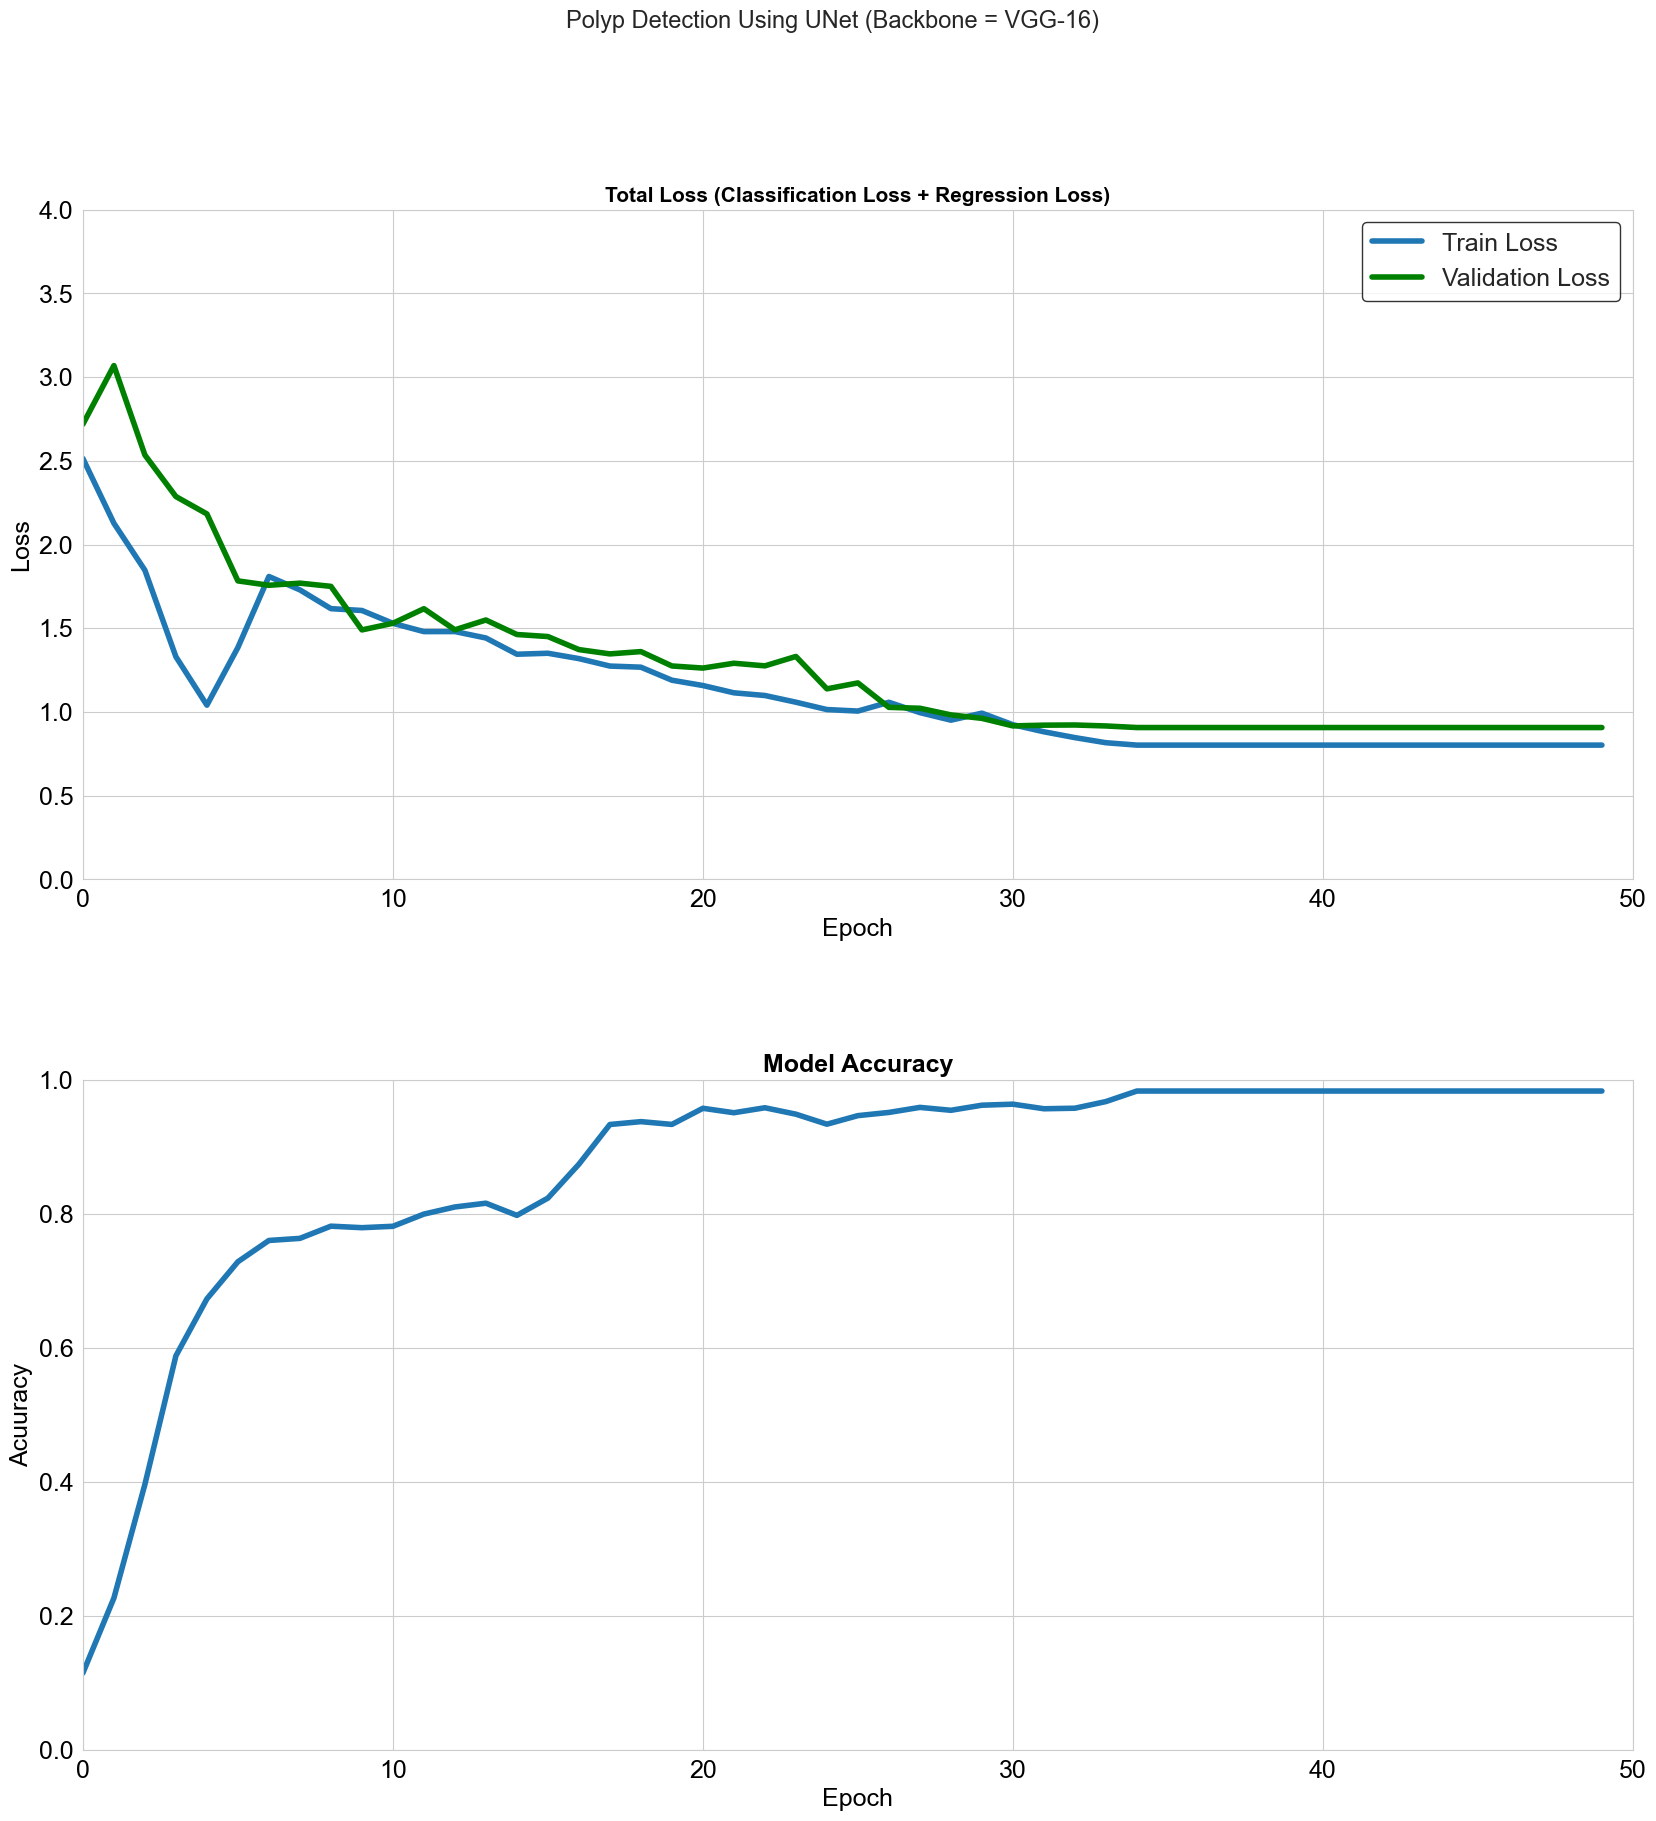

In [93]:
fig = r'C:\Users\Asus\Desktop\vgg16.png'
title = 'Polyp Detection Using UNet (Backbone = VGG-16)'
plot_history(df_vgg16_2, fig, title, epochs)

## VGG-19

In [94]:
df_vgg19_2 = pd.read_csv(r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\Unet_VGG-19.csv")

In [95]:
def plot_history(df_vgg19_2, fig, subtitle, epochs):
    epoch_list = df_vgg19_2['epoch']
    loss = df_vgg19_2['loss']
    val_loss = df_vgg19_2['val_loss']
    val_mAP = df_vgg16_2['mAP']
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

   
    ax1.plot(epoch_list, loss, label='Train Loss', linewidth=4)
    ax1.plot(epoch_list, val_loss, label='Validation Loss', linewidth=4, color='green')
    #ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_xlim(0,50)
    ax1.set_ylim(0, 4)
    ax1.set_ylabel('Loss',fontsize = 18,  color='black')
    ax1.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax1.set_title('Total Loss (Classification Loss + Regression Loss)',fontsize = 15, fontweight='bold', color='black')
    ax1.tick_params(axis='x', colors='black', labelsize=18)
    ax1.tick_params(axis='y', colors='black', labelsize=18)
    l1 = ax1.legend(loc="best", fontsize=18, edgecolor='black', markerscale=2.0)
    
    ax2.plot(epoch_list, val_mAP, label='Validation AP',linewidth=4)
    #ax2.set_xticks(np.arange(1, epochs+1, 1))
    ax2.set_xlim(0,50)
    ax2.set_ylim(0,1)
    ax2.set_ylabel('Acuuracy',fontsize = 18,  color='black')
    ax2.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax2.set_title('Model Accuracy', fontsize = 18, fontweight='bold', color='black')
    ax2.tick_params(axis='x', colors='black', labelsize=18)
    ax2.tick_params(axis='y', colors='black', labelsize=18)
    #l2 = ax2.legend(loc="best", fontsize=18, edgecolor='black',  markerscale=2.0)
    
    plt.savefig(fig, dpi=600)

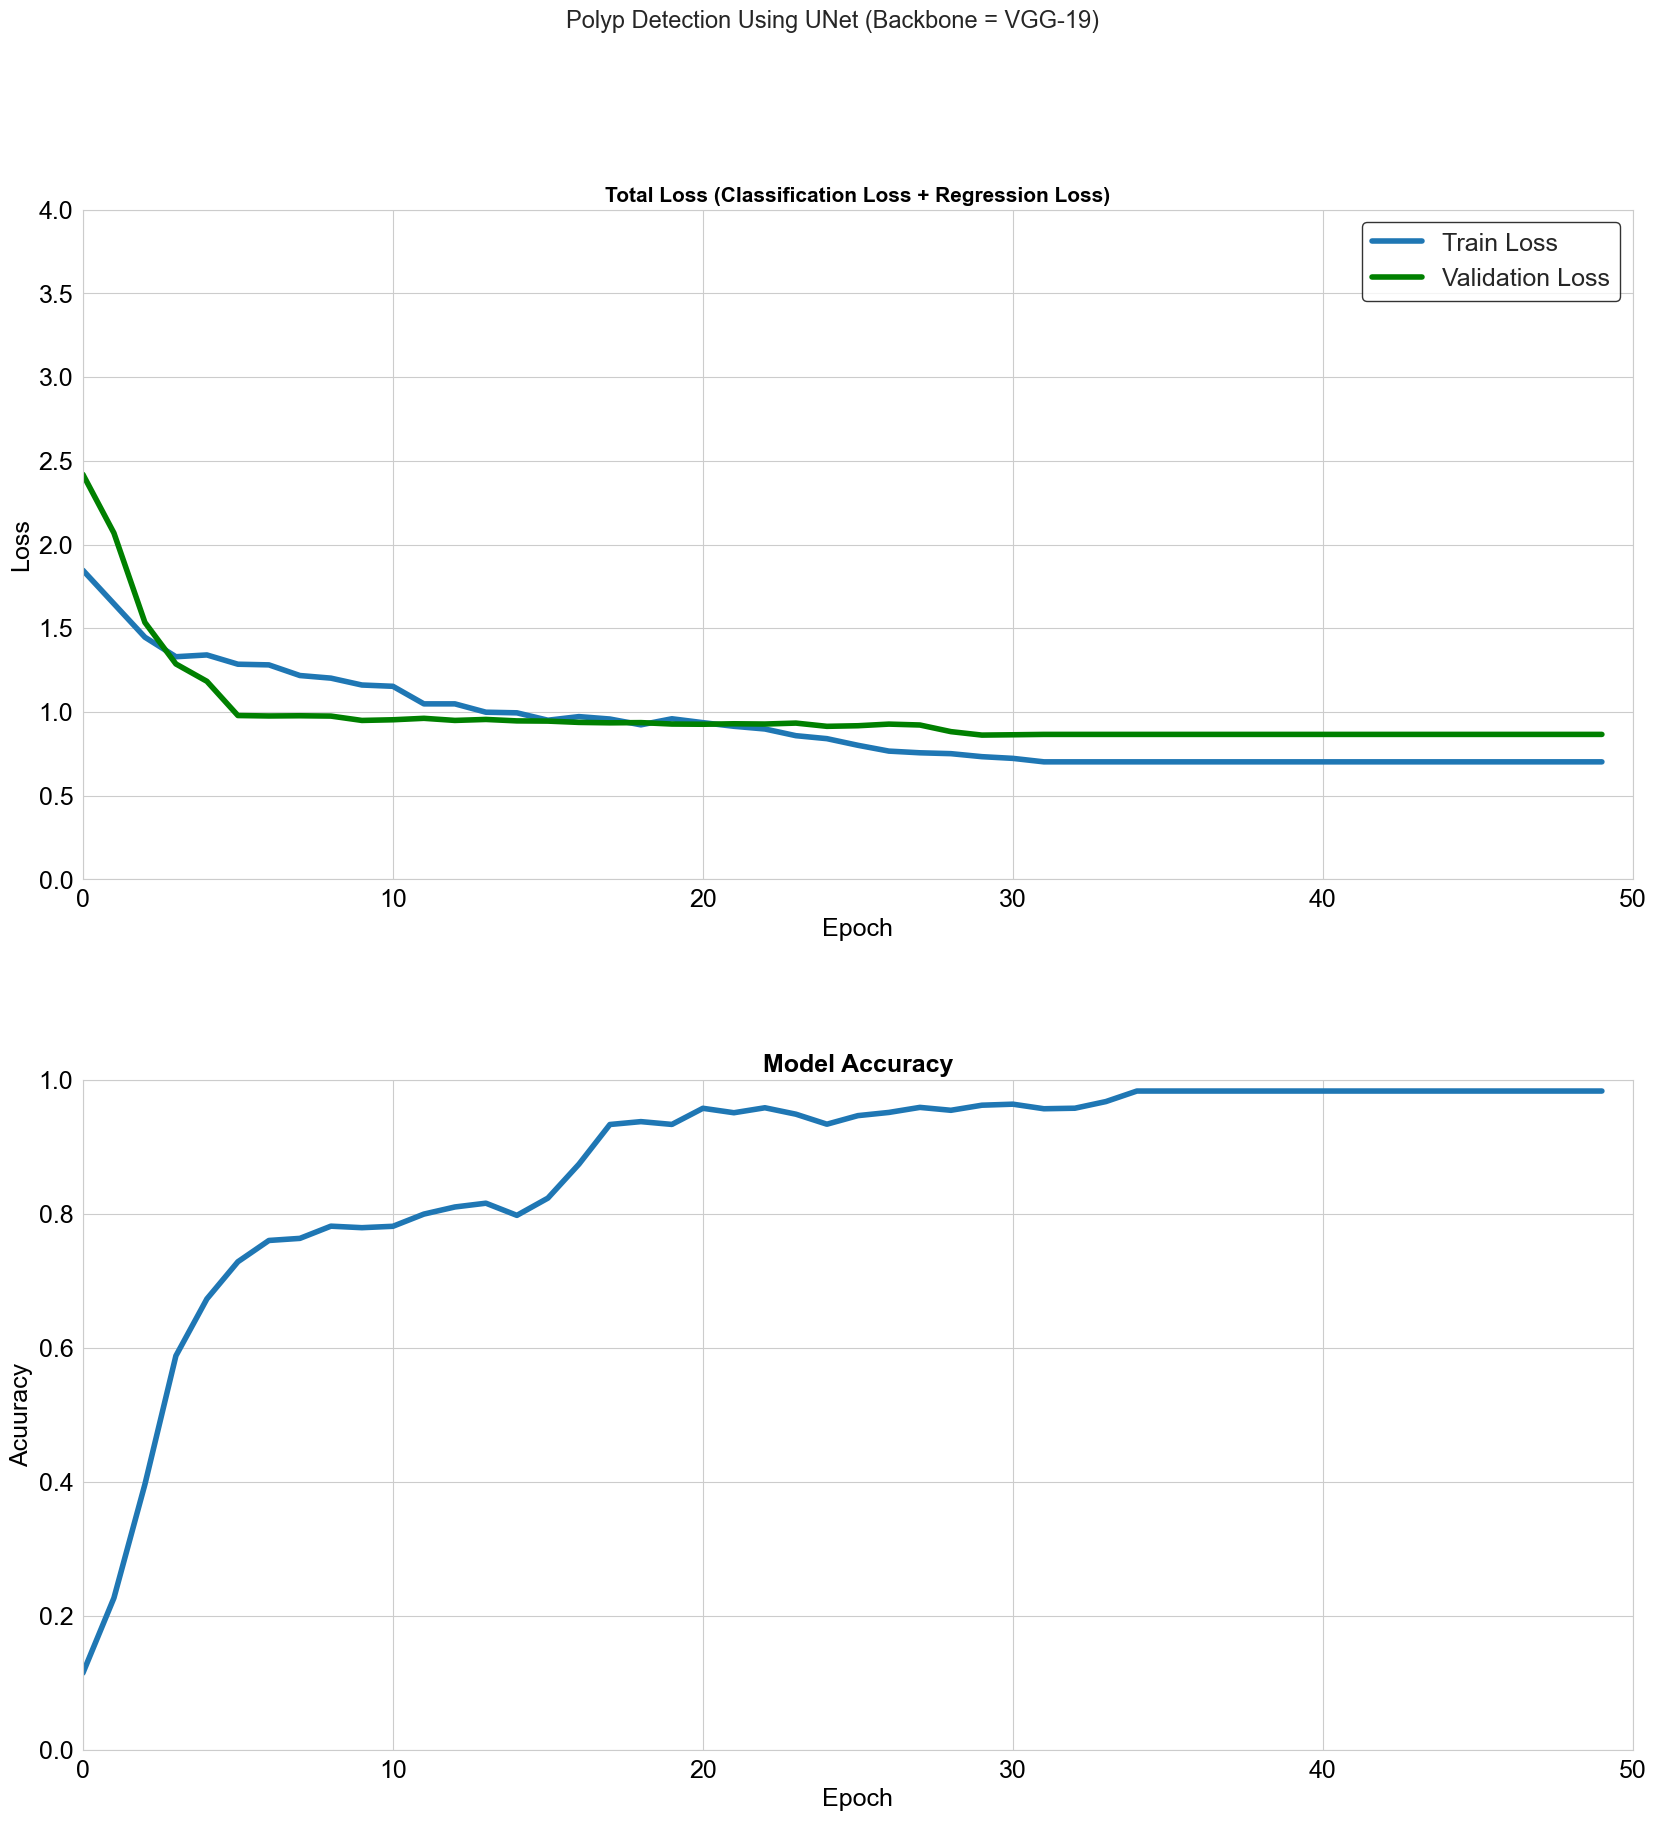

In [96]:
fig = r'C:\Users\Asus\Desktop\vgg19.png'
title = 'Polyp Detection Using UNet (Backbone = VGG-19)'
plot_history(df_vgg19_2, fig, title, epochs)

## comparison plot

In [6]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\All comparison.csv")

In [7]:
def plot_history(df, fig, subtitle, epochs):
    epoch_list = df['epoch']
    loss_19 = df['loss_19']
    loss_16 = df['loss_16']
    loss_152 = df['loss_152']
    loss_101 = df['loss_101']
    loss_50 = df['loss_50']
    val_loss_19 = df['val_loss_19']
    val_loss_16 = df['val_loss_16']
    val_loss_152 = df['val_loss_152']
    val_loss_101 = df['val_loss_101']
    val_loss_50 = df['val_loss_50']
    val_mAP_19 = df['mAP_19']
    val_mAP_16 = df['mAP_16']
    val_mAP_152 = df['mAP_152']
    val_mAP_101 = df['mAP_101']
    val_mAP_50 = df['mAP_50']
    f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 25))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

    ax1.grid(True)
    ax1.plot(epoch_list, loss_19, label='Train Loss', linewidth=4)
    #ax1.plot(epoch_list, val_loss_19, label='Validation Loss', linewidth=4, color='green')
    ax1.plot(epoch_list, loss_16, label='Train Loss', linewidth=4,color='green')
    #ax1.plot(epoch_list, val_loss_16, label='Validation Loss', linewidth=4, color='green',linestyle='dotted')
    ax1.plot(epoch_list, loss_152, label='Train Loss', linewidth=4,color='red')
    #ax1.plot(epoch_list, val_loss_152, label='Validation Loss', linewidth=4, color='green',linestyle=':')
    ax1.plot(epoch_list, loss_101, label='Train Loss', linewidth=4,color='orange')
    #ax1.plot(epoch_list, val_loss_101, label='Validation Loss', linewidth=4, color='green',linestyle='--')
    ax1.plot(epoch_list, loss_50, label='Train Loss', linewidth=4,color='purple')
    #ax1.plot(epoch_list, val_loss_50, label='Validation Loss', linewidth=4, color='green',linestyle='-.')
    #ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_xlim(0,50)
    ax1.set_ylim(0, 4)
    ax1.set_ylabel('Loss',fontsize = 18,  color='black')
    ax1.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax1.set_title('Training Loss (Classification Loss + Regression Loss)',fontsize = 15, fontweight='bold', color='black')
    ax1.tick_params(axis='x', colors='black', labelsize=18)
    ax1.tick_params(axis='y', colors='black', labelsize=18)
    l1 = ax1.legend(loc="best", fontsize=18, edgecolor='black', markerscale=2.0)
    l1.get_texts()[0].set_text('VGG-19')
    l1.get_texts()[1].set_text('VGG-16')
    l1.get_texts()[2].set_text('ResNet-152')
    l1.get_texts()[3].set_text('ResNet-101')
    l1.get_texts()[4].set_text('ResNet-50')
    
    ax2.grid(True)
    ax2.plot(epoch_list, val_loss_19, label='Validation Loss', linewidth=4)
    ax2.plot(epoch_list, val_loss_16, label='Validation Loss', linewidth=4, color='green')
    ax2.plot(epoch_list, val_loss_152, label='Validation Loss', linewidth=4, color='red')
    ax2.plot(epoch_list, val_loss_101, label='Validation Loss', linewidth=4, color='orange')
    ax2.plot(epoch_list, val_loss_50, label='Validation Loss', linewidth=4, color='purple')
    #ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax2.set_xlim(0,50)
    ax2.set_ylim(0, 4)
    ax2.set_ylabel('Loss',fontsize = 18,  color='black')
    ax2.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax2.set_title(' Validation Loss (Classification Loss + Regression Loss)',fontsize = 15, fontweight='bold', color='black')
    ax2.tick_params(axis='x', colors='black', labelsize=18)
    ax2.tick_params(axis='y', colors='black', labelsize=18)
    l2 = ax2.legend(loc="best", fontsize=18, edgecolor='black', markerscale=2.0)
    l2.get_texts()[0].set_text('VGG-19')
    l2.get_texts()[1].set_text('VGG-16')
    l2.get_texts()[2].set_text('ResNet-152')
    l2.get_texts()[3].set_text('ResNet-101')
    l2.get_texts()[4].set_text('ResNet-50')
    
    
    ax3.grid(True)
    ax3.plot(epoch_list, val_mAP_19, label='Validation AP',linewidth=4)
    ax3.plot(epoch_list, val_mAP_16, label='Validation AP',linewidth=4,color='green')
    ax3.plot(epoch_list, val_mAP_152, label='Validation AP',linewidth=4,color='red')
    ax3.plot(epoch_list, val_mAP_101, label='Validation AP',linewidth=4,color='orange')
    ax3.plot(epoch_list, val_mAP_50, label='Validation AP',linewidth=4,color="purple")
    #ax2.set_xticks(np.arange(1, epochs+1, 1))
    ax3.set_xlim(0,50)
    ax3.set_ylim(0,1)
    ax3.set_ylabel('Acuuracy',fontsize = 18,  color='black')
    ax3.set_xlabel('Epoch', fontsize = 18,  color='black')
    ax3.set_title('Model Accuracy', fontsize = 18, fontweight='bold', color='black')
    ax3.tick_params(axis='x', colors='black', labelsize=18)
    ax3.tick_params(axis='y', colors='black', labelsize=18)
    l3 = ax3.legend(loc="best", fontsize=18, edgecolor='black',  markerscale=2.0)
    l3.get_texts()[0].set_text('VGG-19')
    l3.get_texts()[1].set_text('VGG-16')
    l3.get_texts()[2].set_text('ResNet-152')
    l3.get_texts()[3].set_text('ResNet-101')
    l3.get_texts()[4].set_text('ResNet-50')
    
    
    plt.savefig(fig, dpi=600)

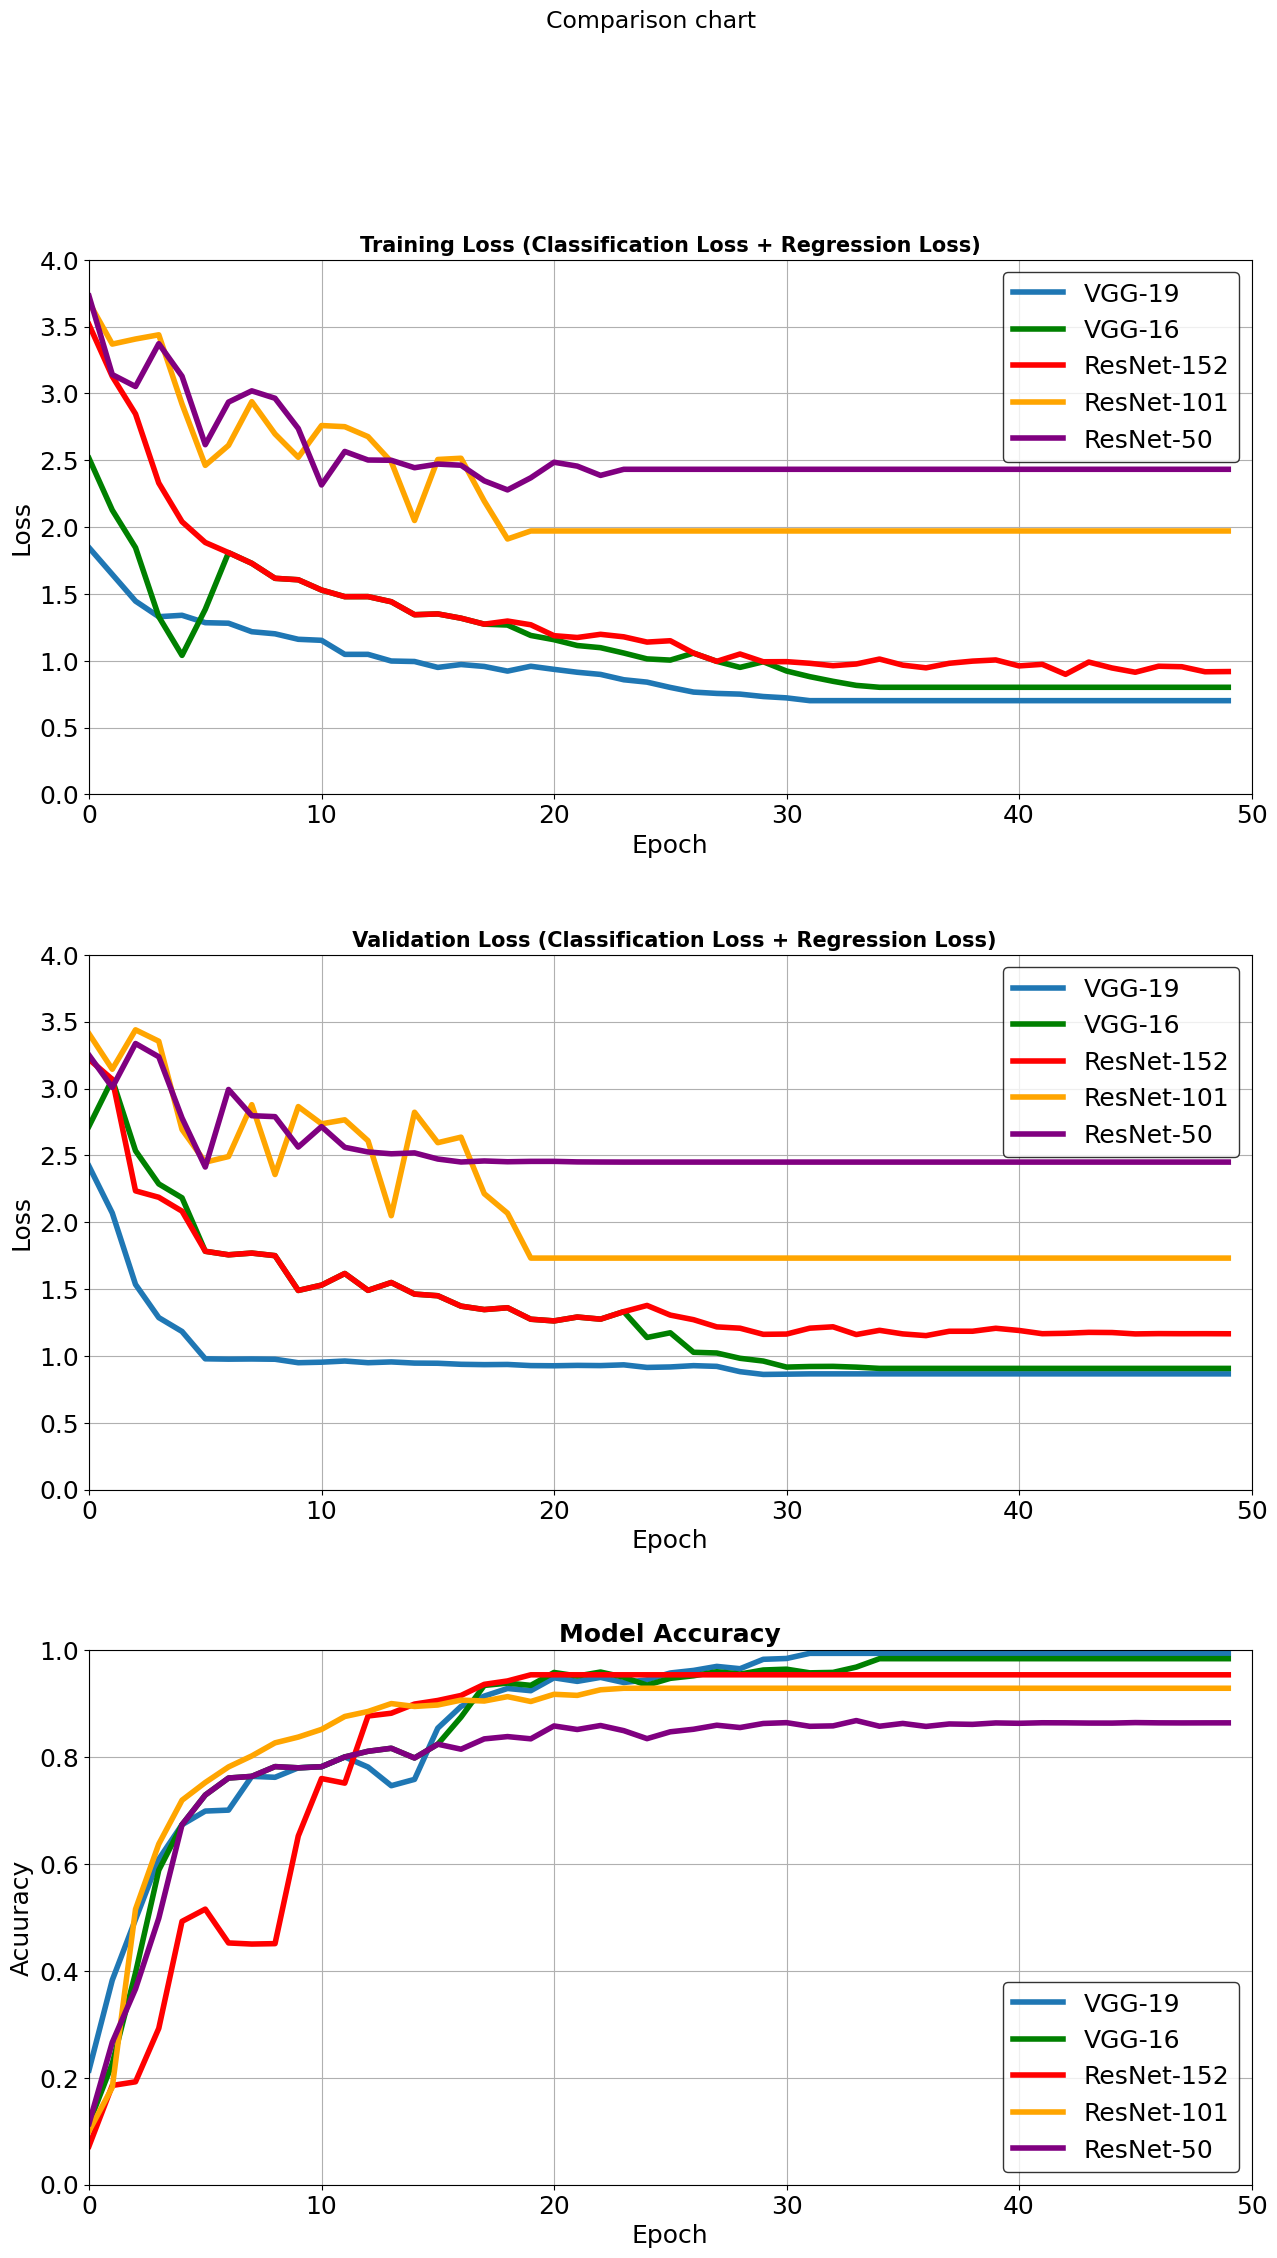

In [8]:
fig = r'C:\Users\Asus\Desktop\comparison.png'
title = 'Comparison chart'
plot_history(df, fig, title, epochs)